# Notebook for debugging

***

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [3]:
n_images = 1

In [4]:
image_size = (128,256)

In [5]:
size_buffer = 10

In [12]:
figsize = (6,3)

***

## Generate particles

In [13]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(3,3.1),
                     distances=(1,2),
                     densities=(0.05,0.1),
                     signal_to_noise=(5,20),
                     diameter_std=0.2,
                     seeding_mode='random', 
                     random_seed=100)

In [14]:
image = Image(random_seed=100)

In [15]:
image.add_particles(particles)

Particles added to the image.


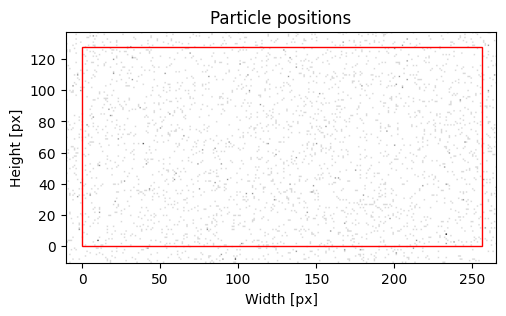

In [16]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           figsize=figsize, 
           filename='particle-positions.png');

In [19]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.


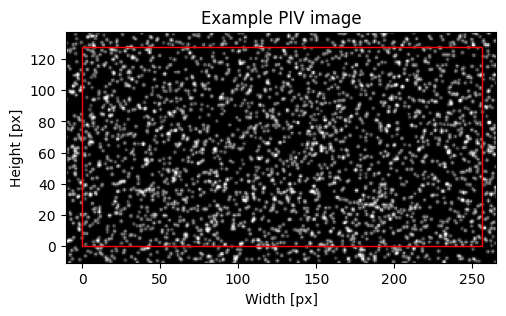

In [20]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image.png');

In [21]:
# plt.scatter(particles.particle_coordinates[0][1], particles.particle_coordinates[0][0], c='k', s=10, zorder=10)
# plt.xticks([i for i in range(0,particles.size_with_buffer[1]+1)])
# plt.yticks([i for i in range(0,particles.size_with_buffer[0]+1)])
# plt.grid(zorder=1)

***

## Generate random velocity field to advect the particles

In [22]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      flow_mode='random',
                      gaussian_filters=(10,11),
                      n_gaussian_filter_iter=20,
                      sin_period=(30,300),
                      displacement=(0,10),
                      random_seed=100)

In [23]:
image.add_flowfield(flowfield)

Velocity field added to the image.


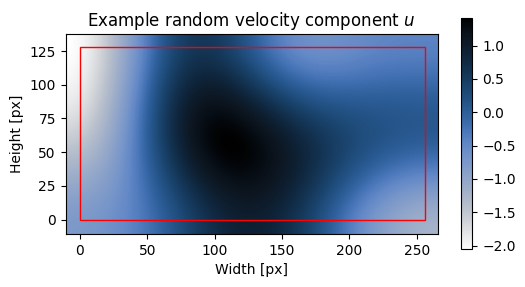

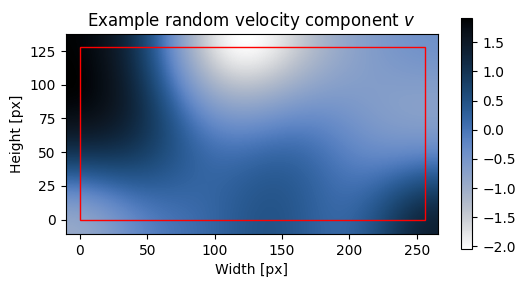

In [24]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          figsize=figsize,
                          filename='example-random-velocity-field.png');

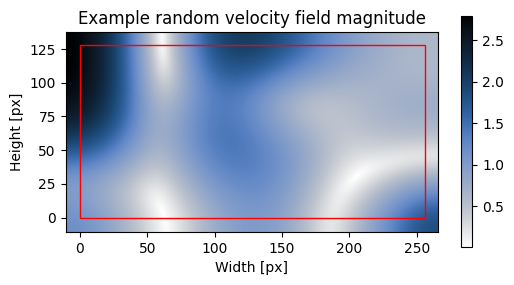

In [25]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude.png');

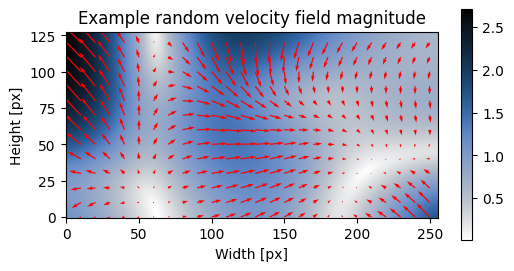

In [26]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-quiver.png');

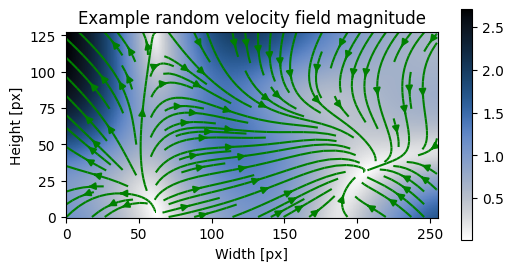

In [27]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-streamplot.png');

***

## Add movement to particles

In [28]:
motion = Motion(particles, 
                flowfield, 
                time_separation=0.1)

In [29]:
motion.forward_euler(n_steps=10)

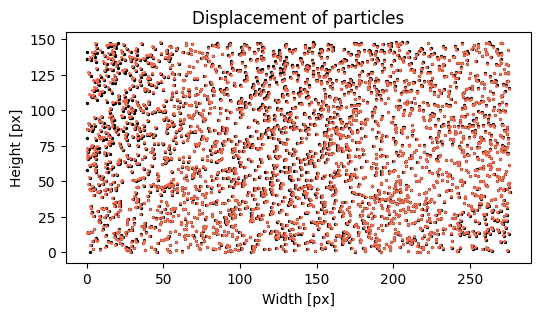

In [30]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-01.png');

#### Update time separation:

In [31]:
motion.time_separation = 0.2

In [32]:
motion.forward_euler(n_steps=10)

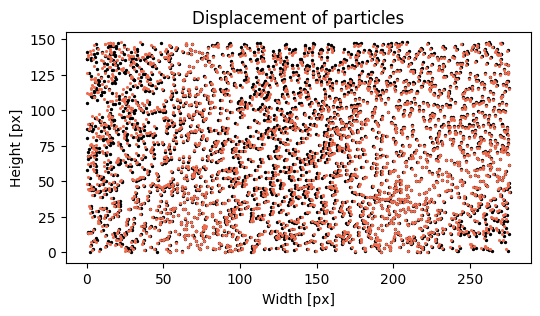

In [33]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-05.png');

#### Visualize the PIV image pair:

In [34]:
image.add_motion(motion)

Particle movement added to the image.


In [38]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.
Reflected light added to images I2.


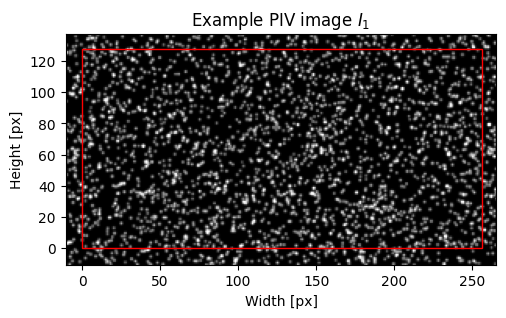

In [39]:
image.plot(0, 
           instance=1,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_1$',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-I1-with-buffer.png');

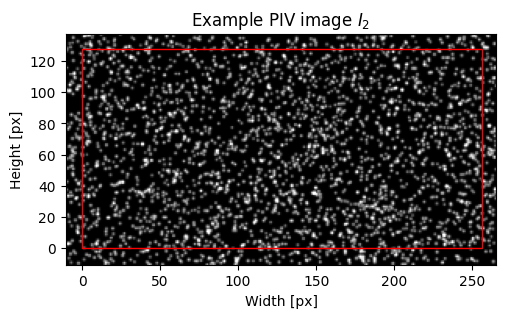

In [40]:
image.plot(0, 
           instance=2,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_2$',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-I2-with-buffer.png');

In [42]:
# image.plot_image_pair(0,
#                       with_buffer=False, 
#                       xlabel='Width [px]',
#                       ylabel='Height [px]',
#                       title='Example PIV image pair $(I_1, I_2)$',
#                       cmap='Greys_r',
#                       figsize=figsize, 
#                       filename='example-image-I1-I2-no-buffer-COMPARE.gif');

***

## Save the dataset

In [44]:
image.remove_buffers()

Buffers removed from images I1.
Buffers removed from images I2.
Buffers removed from the velocity field.


In [46]:
images_tensor = image.image_pairs_to_tensor()

In [47]:
targets_tensor = image.targets_to_tensor()

In [48]:
tensors_dictionary = {"I": images_tensor, "targets": targets_tensor}

In [ ]:
image.save_to_h5(tensors_dictionary, filename='pykitPIV-tutorial-PIV-pairs.h5')

***